In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('expand_frame_repr', False)

In [11]:
# Reading the input file

import os
cwd = os.getcwd()

train_values = cwd + "\\Source Data\\train_values.csv"
train_values = pd.read_csv(train_values)
train_labels = cwd + "\\Source Data\\train_labels.csv"
train_labels = pd.read_csv(train_labels)

train = train_values.join(train_labels.set_index('patient_id'), on='patient_id', how='left')


In [12]:
# Data Prep

re_categorize_values = {"chest_pain_type": {1: "one", 2: "two", 3: "three", 4: "four"},
                       "fasting_blood_sugar_gt_120_mg_per_dl": {0: "Less than 120", 1: "Greater than 120"},
                       "resting_ekg_results": {1: "one", 2: "two", 0: "zero"},
                       "sex": {0: "female", 1: "male"},
                       "exercise_induced_angina": {0: "No", 1: "Yes"}}

train.replace(re_categorize_values, inplace=True)

y = train['heart_disease_present']
x = train.drop(['heart_disease_present', 'patient_id'], axis=1)

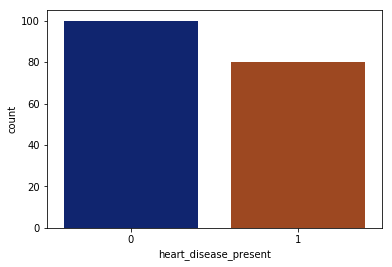

In [13]:
# Analyzing the train data

# train.isna().sum() # There are no missing values

# Checking the class imbalance

sns.countplot(train['heart_disease_present'], palette='dark')

# There is not much class imbalance. We may not need any over or under sampling

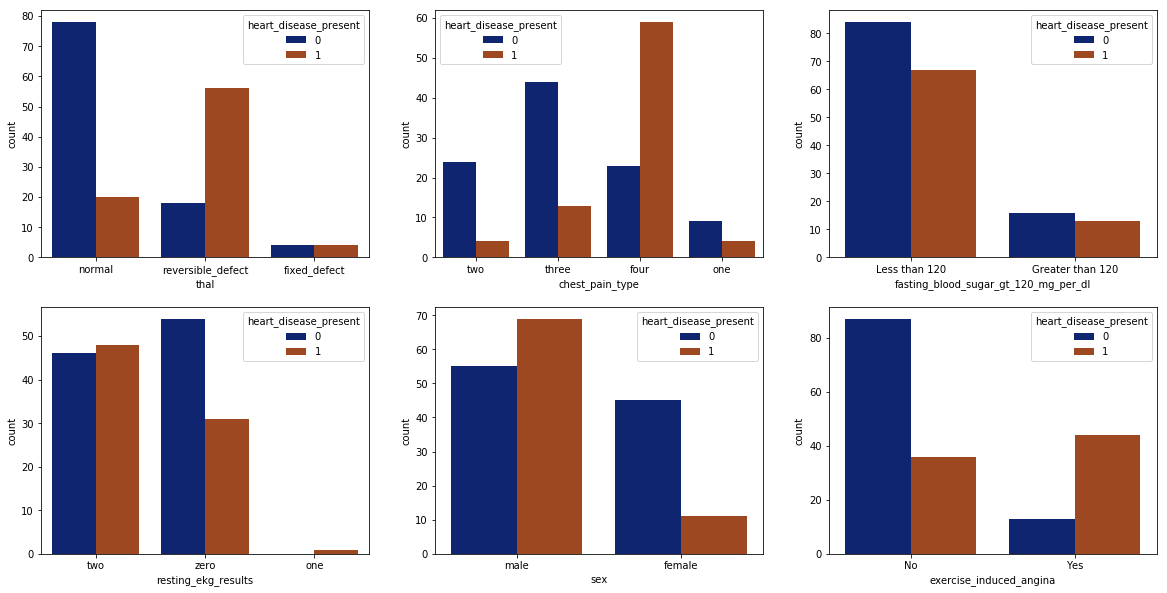

In [21]:
def generate_count_plots(x,y):
    import seaborn as sns
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    new_df = x.select_dtypes(include='object')
    total_cols = new_df.shape[1]
    item_counter = total_cols - 1
    
    # Generating the number of rows required
    
    rows = total_cols // 3
    remainder = total_cols%3
    
    if remainder != 0:
        rows = rows + 1
    
    # Generating code for the plots
    
    breadth = rows * 5
    plt.figure(figsize=(20,breadth))
    for i in range(total_cols):
        x_col = new_df.iloc[:,i]
        plt.subplot(rows, 3, i+1)
        sns.countplot(x_col, hue=y, palette='dark', dodge=True) # Try dodge=False for stacking, but numbers dont look right
        
    plt.show()

generate_count_plots(x,y)

From the above charts, there is a possibility that people that are male sex, and have type four chest pain type, and 
reversable defect thal, and exercise induced angina have high changes of having heart diseases

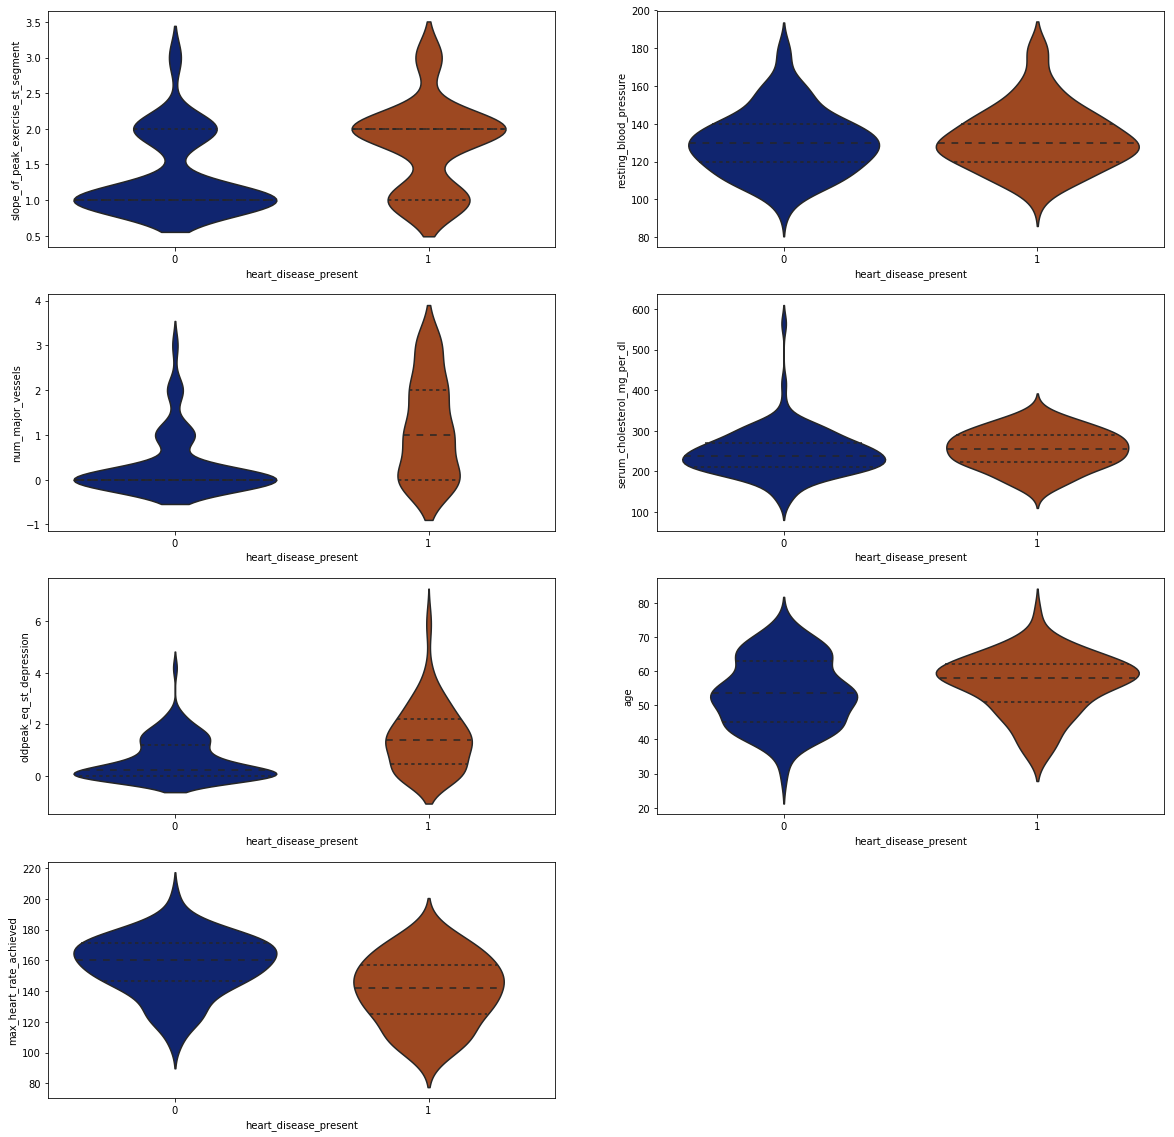

In [15]:
def generate_violin_plots(x,y):
    import seaborn as sns
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    cols_to_include = ['int64', 'float64']
    new_df = x.select_dtypes(include=cols_to_include)
    total_cols = new_df.shape[1]
    item_counter = total_cols - 1
    
    # Generating the number of rows required
    
    rows = total_cols // 2
    remainder = total_cols%2
    
    if remainder != 0:
        rows = rows + 1
    
    # Generating code for the plots
    
    breadth = rows * 5
    plt.figure(figsize=(20,breadth))
    for i in range(total_cols):
        x_col = new_df.iloc[:,i]
        plt.subplot(rows, 2, i+1)
        sns.violinplot(y=x_col, x=y, palette='dark', inner='quartile')
        
    plt.show()

generate_violin_plots(x,y)

# Analysis:

1. slope of peak exercise st segment: Heart disease is more pronounced with people having slope 2 or greater
2. Resting blood pressure does not have much effect on heart disease (interesting)
3. Number of major vessels greater than 0 are more likely to get heart disease
4. Serum cholesterol does not have much effect
5. Oldpeak_eq_st_depression: Greater than 0 is more likely to get heart disease
6. Age between 50 to 70 more likely to have heart disease
7. Maximum heart rate achieved: Less than 140 may have higher chance of heart disease (see if the max heart rate achieved has any relation to age i.e. compare the distribution by age)

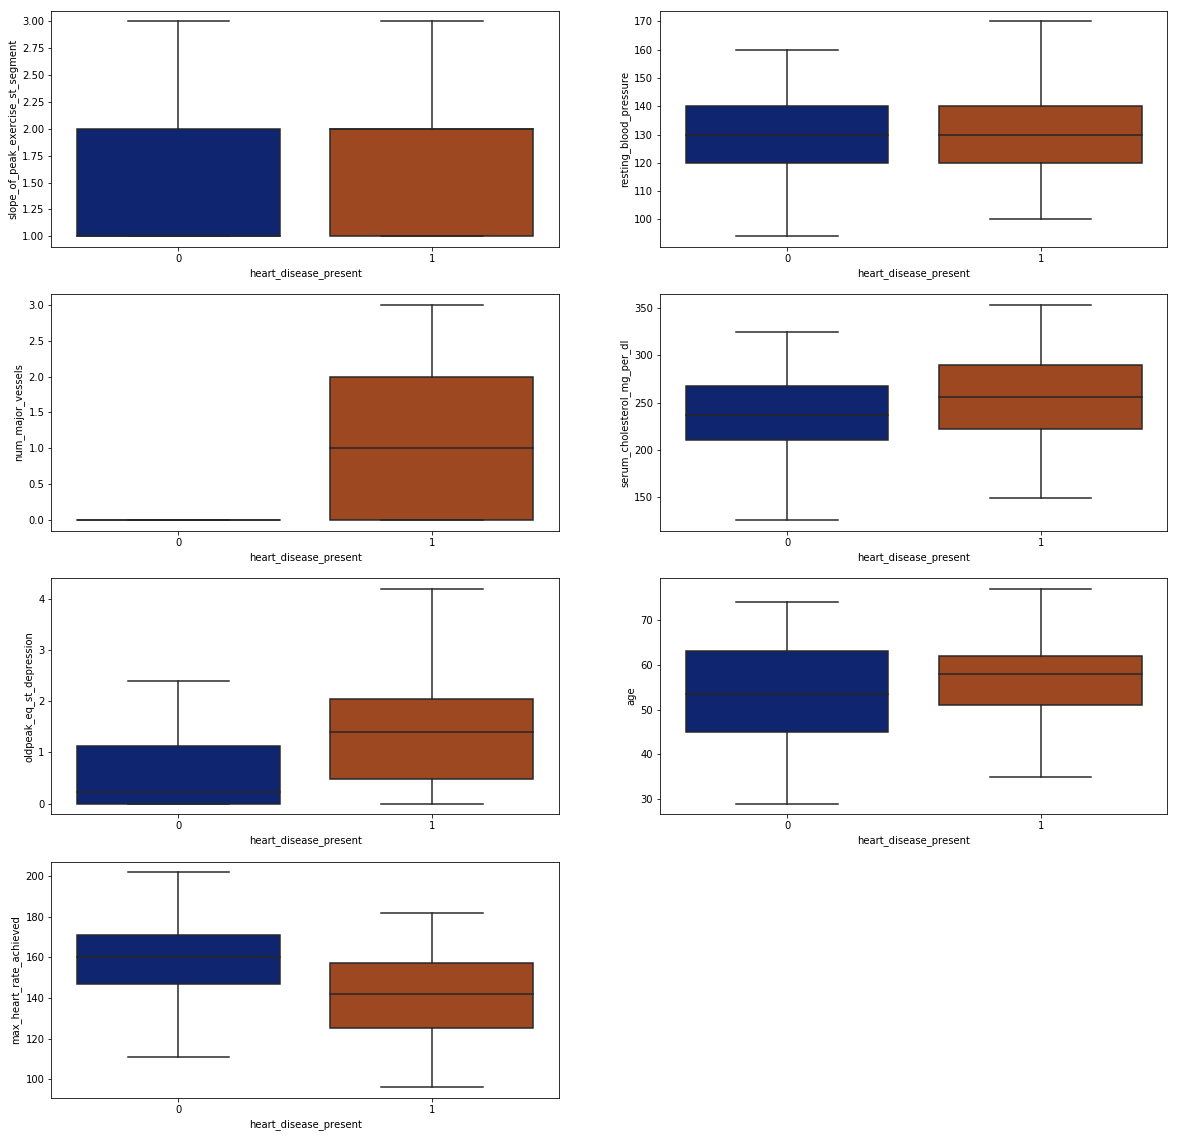

In [18]:
def generate_box_plots(x,y):
    import seaborn as sns
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    cols_to_include =  ['int64', 'float64']
    new_df = x.select_dtypes(include=cols_to_include)
    total_cols = new_df.shape[1]
    item_counter = total_cols - 1
    
    # Generating the number of rows required
    
    rows = total_cols // 2
    remainder = total_cols%2
    
    if remainder != 0:
        rows = rows + 1
    
    # Generating code for the plots
    #color_item = x['sex']
    breadth = rows * 5
    plt.figure(figsize=(20,breadth))
    for i in range(total_cols):
        x_col = new_df.iloc[:,i]
        plt.subplot(rows, 2, i+1)
        sns.boxplot(y=x_col, x=y, palette='dark')
        #sns.boxplot(y=x_col, x=y, palette='dark', hue=color_item)
    plt.show()

generate_box_plots(x,y)

# Fixing Outliers

In [ ]:
# Fixing outliers for the resting blood pressure
present_uplimit = (1.5 * (x.resting_blood_pressure[y==1].quantile(0.75) - x.resting_blood_pressure[y==1].quantile(0.25))) + x.resting_blood_pressure[y==1].quantile(0.75)
absense_uplimit = (1.5 * (x.resting_blood_pressure[y==0].quantile(0.75) - x.resting_blood_pressure[y==0].quantile(0.25))) + x.resting_blood_pressure[y==0].quantile(0.75)
present_lowlimit =  x.resting_blood_pressure[y==1].quantile(0.25) - (1.5 * (x.resting_blood_pressure[y==1].quantile(0.75) - x.resting_blood_pressure[y==1].quantile(0.25)))
absense_lowlimit =  x.resting_blood_pressure[y==0].quantile(0.25) - (1.5 * (x.resting_blood_pressure[y==0].quantile(0.75) - x.resting_blood_pressure[y==0].quantile(0.25)))
present_median_value = x['resting_blood_pressure'][y==1].median()
absense_median_value = x['resting_blood_pressure'][y==0].median()


x['resting_blood_pressure'] = np.where((y == 1) & (x.resting_blood_pressure > present_uplimit), present_median_value,
                                       np.where((y == 1) & (x.resting_blood_pressure < present_lowlimit), present_median_value,
                                                np.where((y == 0) & (x.resting_blood_pressure > absense_uplimit), absense_median_value,
                                                        np.where((y == 0) & (x.resting_blood_pressure < absense_lowlimit), absense_median_value, x.resting_blood_pressure))))


# Fixing outliers for the major num of vessels
present_uplimit = (1.5 * (x.num_major_vessels [y==1].quantile(0.75) - x.num_major_vessels[y==1].quantile(0.25))) + x.num_major_vessels[y==1].quantile(0.75)
absense_uplimit = (1.5 * (x.num_major_vessels[y==0].quantile(0.75) - x.num_major_vessels[y==0].quantile(0.25))) + x.num_major_vessels[y==0].quantile(0.75)
present_lowlimit =  x.num_major_vessels[y==1].quantile(0.25) - (1.5 * (x.num_major_vessels[y==1].quantile(0.75) - x.num_major_vessels[y==1].quantile(0.25)))
absense_lowlimit =  x.num_major_vessels[y==0].quantile(0.25) - (1.5 * (x.num_major_vessels[y==0].quantile(0.75) - x.num_major_vessels[y==0].quantile(0.25)))
present_median_value = x['num_major_vessels'][y==1].median()
absense_median_value = x['num_major_vessels'][y==0].median()


x['num_major_vessels'] = np.where((y == 1) & (x.num_major_vessels > present_uplimit), present_median_value,
                                       np.where((y == 1) & (x.num_major_vessels < present_lowlimit), present_median_value,
                                                np.where((y == 0) & (x.num_major_vessels > absense_uplimit), absense_median_value,
                                                        np.where((y == 0) & (x.num_major_vessels < absense_lowlimit), absense_median_value, x.num_major_vessels))))



# Fixing serum cholesterol mg per dl

present_uplimit = (1.5 * (x.serum_cholesterol_mg_per_dl[y==1].quantile(0.75) - x.serum_cholesterol_mg_per_dl[y==1].quantile(0.25))) + x.serum_cholesterol_mg_per_dl[y==1].quantile(0.75)
absense_uplimit = (1.5 * (x.serum_cholesterol_mg_per_dl[y==0].quantile(0.75) - x.serum_cholesterol_mg_per_dl[y==0].quantile(0.25))) + x.serum_cholesterol_mg_per_dl[y==0].quantile(0.75)
present_lowlimit =  x.serum_cholesterol_mg_per_dl[y==1].quantile(0.25) - (1.5 * (x.serum_cholesterol_mg_per_dl[y==1].quantile(0.75) - x.serum_cholesterol_mg_per_dl[y==1].quantile(0.25)))
absense_lowlimit =  x.serum_cholesterol_mg_per_dl[y==0].quantile(0.25) - (1.5 * (x.serum_cholesterol_mg_per_dl[y==0].quantile(0.75) - x.serum_cholesterol_mg_per_dl[y==0].quantile(0.25)))
present_median_value = x['serum_cholesterol_mg_per_dl'][y==1].median()
absense_median_value = x['serum_cholesterol_mg_per_dl'][y==0].median()


x['serum_cholesterol_mg_per_dl'] = np.where((y == 1) & (x.serum_cholesterol_mg_per_dl > present_uplimit), present_median_value,
                                       np.where((y == 1) & (x.serum_cholesterol_mg_per_dl < present_lowlimit), present_median_value,
                                                np.where((y == 0) & (x.serum_cholesterol_mg_per_dl > absense_uplimit), absense_median_value,
                                                        np.where((y == 0) & (x.serum_cholesterol_mg_per_dl < absense_lowlimit), absense_median_value, x.serum_cholesterol_mg_per_dl))))


# Fixing old peak eq st depression

present_uplimit = (1.5 * (x.oldpeak_eq_st_depression[y==1].quantile(0.75) - x.oldpeak_eq_st_depression[y==1].quantile(0.25))) + x.oldpeak_eq_st_depression[y==1].quantile(0.75)
absense_uplimit = (1.5 * (x.oldpeak_eq_st_depression[y==0].quantile(0.75) - x.oldpeak_eq_st_depression[y==0].quantile(0.25))) + x.oldpeak_eq_st_depression[y==0].quantile(0.75)
present_lowlimit =  x.oldpeak_eq_st_depression[y==1].quantile(0.25) - (1.5 * (x.oldpeak_eq_st_depression[y==1].quantile(0.75) - x.oldpeak_eq_st_depression[y==1].quantile(0.25)))
absense_lowlimit =  x.oldpeak_eq_st_depression[y==0].quantile(0.25) - (1.5 * (x.oldpeak_eq_st_depression[y==0].quantile(0.75) - x.oldpeak_eq_st_depression[y==0].quantile(0.25)))
present_median_value = x['oldpeak_eq_st_depression'][y==1].median()
absense_median_value = x['oldpeak_eq_st_depression'][y==0].median()


x['oldpeak_eq_st_depression'] = np.where((y == 1) & (x.oldpeak_eq_st_depression > present_uplimit), present_median_value,
                                       np.where((y == 1) & (x.oldpeak_eq_st_depression < present_lowlimit), present_median_value,
                                                np.where((y == 0) & (x.oldpeak_eq_st_depression > absense_uplimit), absense_median_value,
                                                        np.where((y == 0) & (x.oldpeak_eq_st_depression < absense_lowlimit), absense_median_value, x.oldpeak_eq_st_depression))))

# Fixing max heart rate achieved

present_uplimit = (1.5 * (x.max_heart_rate_achieved[y==1].quantile(0.75) - x.max_heart_rate_achieved[y==1].quantile(0.25))) + x.max_heart_rate_achieved[y==1].quantile(0.75)
absense_uplimit = (1.5 * (x.max_heart_rate_achieved[y==0].quantile(0.75) - x.max_heart_rate_achieved[y==0].quantile(0.25))) + x.max_heart_rate_achieved[y==0].quantile(0.75)
present_lowlimit =  x.max_heart_rate_achieved[y==1].quantile(0.25) - (1.5 * (x.max_heart_rate_achieved[y==1].quantile(0.75) - x.max_heart_rate_achieved[y==1].quantile(0.25)))
absense_lowlimit =  x.max_heart_rate_achieved[y==0].quantile(0.25) - (1.5 * (x.max_heart_rate_achieved[y==0].quantile(0.75) - x.max_heart_rate_achieved[y==0].quantile(0.25)))
present_median_value = x['max_heart_rate_achieved'][y==1].median()
absense_median_value = x['max_heart_rate_achieved'][y==0].median()


x['max_heart_rate_achieved'] = np.where((y == 1) & (x.max_heart_rate_achieved > present_uplimit), present_median_value,
                                       np.where((y == 1) & (x.max_heart_rate_achieved < present_lowlimit), present_median_value,
                                                np.where((y == 0) & (x.max_heart_rate_achieved > absense_uplimit), absense_median_value,
                                                        np.where((y == 0) & (x.max_heart_rate_achieved < absense_lowlimit), absense_median_value, x.max_heart_rate_achieved))))


# Feature Engineering

In [27]:
x['heart_risk'] = np.where(x.sex == 'male',0.25,0) + np.where(x.chest_pain_type == 'four',0.5,0) + np.where(x.exercise_induced_angina == 'Yes',0.5,0) + np.where(x.thal == 'reversible_defect',0.5,0) + np.where(x.slope_of_peak_exercise_st_segment >= 2,1,0) + np.where(x.num_major_vessels > 0, 1,0) + np.where(x.oldpeak_eq_st_depression > 0, 1,0) + np.where((x.age > 50) & (x.age < 70),0.5,0) + np.where(x.max_heart_rate_achieved < 140 , 1,0) 


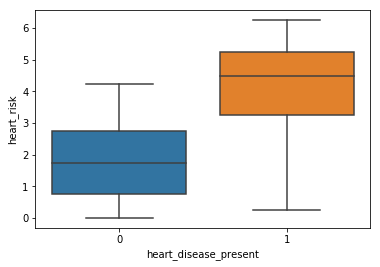

In [29]:
sns.boxplot(y=x['heart_risk'], x=y)